In [1]:
import pandas as pd
liveStock = pd.read_csv('FAOSTAT_Livestock_Primary.csv', sep=',', index_col=0)
liveAnimals = pd.read_csv('FAOSTAT_LiveAnimals.csv', sep=',', index_col=0)
liveStock = liveStock.drop(["Note"], axis=1).dropna().loc[:,["Area","Element","Item","Year","Unit","Value"]]
liveAnimals = liveAnimals.drop(["Note"], axis=1).dropna().loc[:,["Area","Item","Year","Unit","Value"]]
islands = liveStock.loc[liveStock["Area"] == "Pacific Islands Trust Territory"]
value_liveStock = liveStock["Area"].drop_duplicates()
value_liveAnimals = liveAnimals["Area"].drop_duplicates()
display(islands)
display(liveAnimals)
print(value_liveStock)
print(value_liveAnimals)

C:\Users\mrcxp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Area,Element,Item,Year,Unit,Value
Domain Code,,,,,,
QL,Pacific Islands Trust Territory,Laying,"Eggs, hen, in shell",1990,1000 Head,71.0
QL,Pacific Islands Trust Territory,Producing Animals/Slaughtered,"Hides, cattle, fresh",1990,Head,1800.0
QL,Pacific Islands Trust Territory,Production,"Meat indigenous, cattle",1990,Head,1800.0
QL,Pacific Islands Trust Territory,Production,"Meat indigenous, chicken",1990,1000 Head,190.0
QL,Pacific Islands Trust Territory,Production,"Meat indigenous, goat",1990,Head,1200.0
QL,Pacific Islands Trust Territory,Production,"Meat indigenous, pig",1990,Head,27600.0
QL,Pacific Islands Trust Territory,Producing Animals/Slaughtered,"Meat, cattle",1990,Head,1800.0
QL,Pacific Islands Trust Territory,Producing Animals/Slaughtered,"Meat, chicken",1990,1000 Head,190.0
QL,Pacific Islands Trust Territory,Producing Animals/Slaughtered,"Meat, goat",1990,Head,1200.0


,Area,Item,Year,Unit,Value
Domain Code,,,,,
QA,Afghanistan,Asses,1964,Head,1150000.0
QA,Afghanistan,Asses,1973,Head,1250000.0
QA,Afghanistan,Asses,1974,Head,1250000.0
QA,Afghanistan,Asses,1975,Head,1250000.0
QA,Afghanistan,Asses,1976,Head,1250000.0
...,...,...,...,...,...
QA,Zimbabwe,Turkeys,2014,1000 Head,28.0
QA,Zimbabwe,Turkeys,2015,1000 Head,28.0
QA,Zimbabwe,Turkeys,2016,1000 Head,29.0


Domain Code
QL       Afghanistan
QL           Albania
QL           Algeria
QL    American Samoa
QL            Angola
           ...      
QL    Western Sahara
QL             Yemen
QL      Yugoslav SFR
QL            Zambia
QL          Zimbabwe
Name: Area, Length: 225, dtype: object
Domain Code
QA       Afghanistan
QA           Albania
QA           Algeria
QA    American Samoa
QA            Angola
           ...      
QA    Western Sahara
QA             Yemen
QA      Yugoslav SFR
QA            Zambia
QA          Zimbabwe
Name: Area, Length: 225, dtype: object


In [113]:
#LiveAnimals
mil = liveAnimals.loc[liveAnimals["Unit"] == "1000 Head"]
una = liveAnimals.loc[liveAnimals["Unit"] != "1000 Head"]
mil["Value"]= mil["Value"].mul(1000)
mil["Unit"] = "Head"
Animals = pd.concat([mil,una])
Animals = Animals.loc[Animals["Year"] >= 1990]
#display(Animals)
Animal_labels = Animals["Item"].drop_duplicates().values
years = sorted(Animals["Year"].drop_duplicates().values)
country = Animals["Area"].drop_duplicates().values
print("###################################################")
print(Animal_labels,sorted(years),country)
print("###################################################")
#Animals = Animals.loc[Animals["Area"] == "Afghanistan"]
#display(Animals["Item"].value_counts())

#display(Animals["Year"].value_counts())
#print(len(Animal_labels), len(country), len(years), len(years)*len(country), len(Animal_labels)*len(country)*len(years))

temp = Animals["Area"].value_counts()
#display(temp)

def eliminar_Sesgo(dataset, column):
    vals = dataset[column].value_counts().values
    indexs = dataset[column].value_counts().index
    val_max = dataset[column].value_counts().max()
    real_list = list()
    for i in range(len(vals)):
        if vals[i] >= val_max/2:
            real_list.append(indexs[i])
    
    new_data = pd.DataFrame()
    for i in range(len(real_list)):
        print(real_list[i])
        new_data = pd.concat([new_data,dataset.loc[dataset[column] == real_list[i]]])
                
    return new_data

def value_Total(dataset,col1, col2, labels1 = [], labels2 = []):
    value = "Value"
    df_list = list()
    for item1 in labels1:
        temp_list = list()
        for item2 in labels2:
            temp_list.append([item2, dataset.loc[(dataset[col1] == item1) & (dataset[col2] == item2)][value].sum()])
        df_list.append([item1, temp_list])
        
    return df_list
        
new_data = value_Total(Animals, "Item", "Year", Animal_labels, years)
print(new_data[7])
#display(new_data.loc[new_data["Area"] == "United States of America"])

C:\Users\mrcxp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mrcxp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###################################################
['Chickens' 'Ducks' 'Geese and guinea fowls' 'Turkeys' 'Rabbits and hares'
 'Rodents, other' 'Pigeons, other birds' 'Asses' 'Camels' 'Cattle' 'Goats'
 'Horses' 'Mules' 'Sheep' 'Buffaloes' 'Beehives' 'Pigs' 'Camelids, other'] [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, M

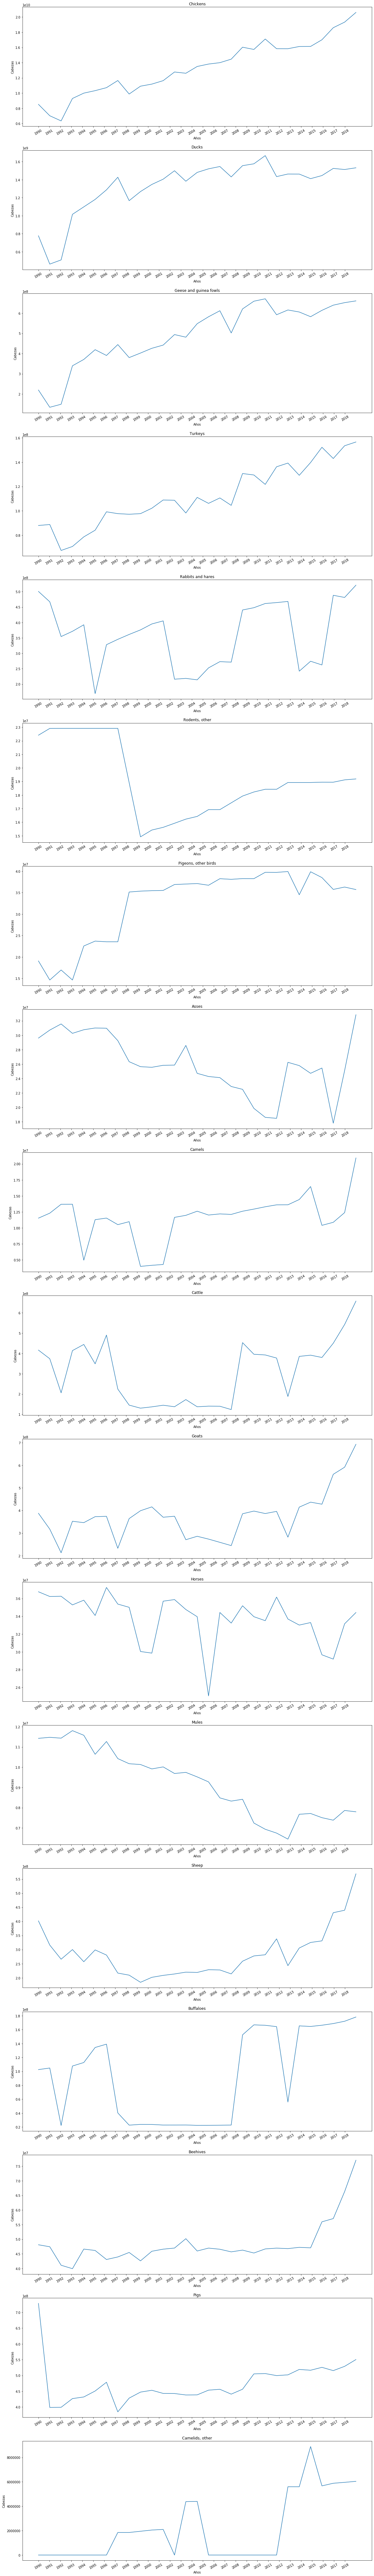

In [111]:
import matplotlib.pyplot as plt
import numpy as np

n_años = len(years)
n_animales = len(Animal_labels)

x_edge = np.linspace(0, n_años, n_años)

fig, ax = plt.subplots(n_animales, figsize=(20,150))
#plt.xticks(x, fecha, rotation='vertical')
#plt.setp(ax, xticklabels=fecha, rotation='vertical')
for i in range(n_animales):
    suma_heads = []
    for x in range(n_años):
        suma_heads.append(new_data[i][1][x][1])
    #print(suma_heads)
    suma_heads = np.array(suma_heads)
    #print(suma_heads.shape)
    ax[i].set_title(Animal_labels[i])
    ax[i].set_xlabel("Años")
    ax[i].set_ylabel("Cabezas")
    ax[i].set_xticks(np.arange(n_años))
    ax[i].set_xticklabels(years, rotation=30)
    ax[i].plot(x_edge, suma_heads, '-')
#ax.set_xticklabels(nombres_comunas)
#ax.fill_between(x, promedio - dstd, promedio + dstd, alpha=1)
#ax.plot(x, promedio, 'o', color='tab:brown')